In [152]:
library(repr)
library(dplyr)
library(Rmisc)
library(RColorBrewer)
library(ggplot2)
library(data.table)
df =fread('cleaned.csv')
str(df)
df$Episodes <- as.numeric(df$Episodes)

Classes ‘data.table’ and 'data.frame':	3371 obs. of  11 variables:
 $ V1      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Name    : chr  "Patalliro!" "Mahou no Princess Minky Momo" "Kikou Kantai Dairugger XV" "Ochamegami Monogatari: Korokoro Pollon" ...
 $ Studio  : chr  "Toei Animation" "Production Reed" "Toei Animation" "-" ...
 $ Episodes: chr  "49" "63" "52" "46" ...
 $ Genres  : chr  "[Adventure, Comedy, Romance, Shoujo, Shounen Ai]" "[Magic, Shoujo]" "[Action, Adventure, Mecha, Sci-Fi, Shounen]" "[Parody, Magic, Comedy]" ...
 $ Source  : chr  "Manga" "Original" "-" "Manga" ...
 $ Type    : chr  "TV" "TV" "TV" "TV" ...
 $ Score   : num  7.62 6.77 6.56 7.13 6.38 ...
 $ Members : chr  "2,748" "2,524" "1,228" "1,169" ...
 $ Season  : chr  "Spring" "Spring" "Spring" "Spring" ...
 $ Year    : int  1982 1982 1982 1982 1982 1982 1982 1982 1982 1982 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

<h1> Distribution</h1>
Before starting, this is the dist of the shows grabbed over the years. I wrote a web scraper that randomly pulled from the past 30 years. This way, we can keep in mind why the data points look the way they do on the graphs.<br>

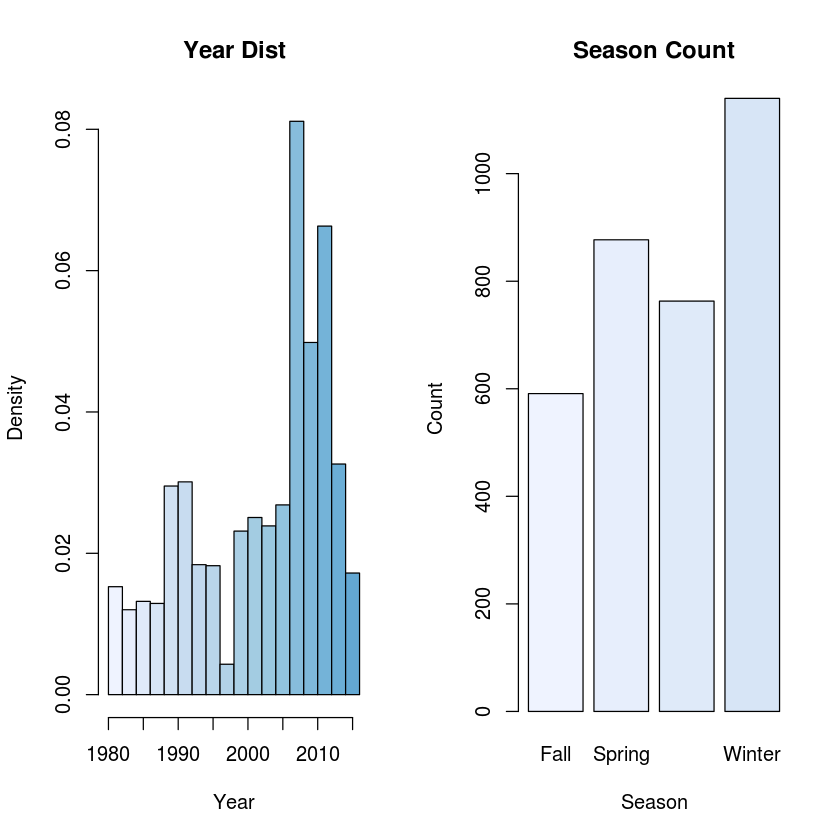

In [150]:
cols <- colorRampPalette(brewer.pal(7,"Blues"))(length(unique(df$Year)))
par(mfrow = c(1,2))
hist(df$Year,main = 'Year Dist',xlab = 'Year', freq = F,col = cols)
barplot(table(df$Season), main='Season Count',xlab = 'Season',ylab='Count', col=cols)

<h1>Golden age of anime?</h1>
Seems to be no particular high scoring season or year, standard deviation is quite small.
<br>No "Golden Age" of anime

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.388   6.726   6.815   6.833   6.931   7.189 

[1] 0.1775724

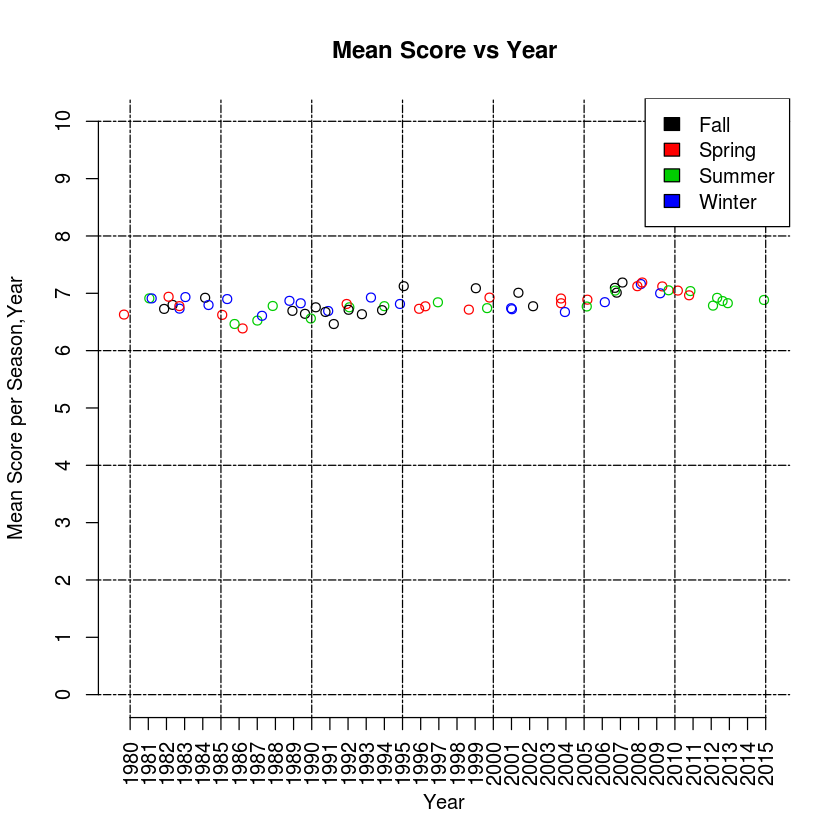

In [11]:
temp <-df[,mean(Score),by=.(Season,Year)]
plot(V1~jitter(Year,2), xlab = "",ylab="",
     temp,
     ylim=c(0,10),
     axes = FALSE,
     col=1:length(unique(temp$Season)))
title(main = 'Mean Score vs Year',xlab = 'Year',ylab = 'Mean Score per Season,Year')
grid (NULL,NULL, lty = 6, col = "black") 

axis(1,at=seq(min(temp$Year),max(temp$Year)),las=3)
axis(2,at=seq(0,10),las=3)
legend('topright',legend=levels(as.factor(temp$Season)),fill=1:length(unique(temp$Season)) )
summary(temp$V1);sd(temp$V1)

<h1>Members are the number of people who have rated a certain show.</h1><br>
This graph shows the total number of members per year. Seems as far as anime goes, the growth has been exponential after 2000

In [14]:
df$Members <- as.numeric(gsub(",", "", df$Members))
members <- df[,lapply(.SD,sum),by=Year,.SDcols='Members']
members <- members[order(Year,Members)]


In [156]:
fitsq=lm(Members~poly(Year,5),data=members)
predsq = predict(fitsq,newdata=members)
summary(fitsq)



Call:
lm(formula = Members ~ poly(Year, 5), data = members)

Residuals:
     Min       1Q   Median       3Q      Max 
-4438905  -278213    10381   251887  5458555 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2952293     328448   8.989 1.33e-09 ***
poly(Year, 5)1 17426271    1886788   9.236 7.59e-10 ***
poly(Year, 5)2  5904914    1886788   3.130  0.00417 ** 
poly(Year, 5)3 -3236079    1886788  -1.715  0.09778 .  
poly(Year, 5)4 -6417159    1886788  -3.401  0.00210 ** 
poly(Year, 5)5 -3934948    1886788  -2.086  0.04660 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1887000 on 27 degrees of freedom
Multiple R-squared:  0.8085,	Adjusted R-squared:  0.773 
F-statistic: 22.79 on 5 and 27 DF,  p-value: 0.00000000649


<br>

In [157]:
fitlin=lm(Members~Year,data=members)
predlin = predict(fitlin,newdata=members)
summary(fitlin)


Call:
lm(formula = Members ~ Year, data = members)

Residuals:
     Min       1Q   Median       3Q      Max 
-3852874 -1624982   -74473  1340541  6854080 

Coefficients:
              Estimate Std. Error t value     Pr(>|t|)    
(Intercept) -579683227   84524985  -6.858 0.0000001097 ***
Year            291782      42329   6.893 0.0000000995 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2528000 on 31 degrees of freedom
Multiple R-squared:  0.6052,	Adjusted R-squared:  0.5924 
F-statistic: 47.52 on 1 and 31 DF,  p-value: 0.00000009952


<h1> Member growth </h1>
Members are the amount of people who have put the show in their 'List'. This usually means, but not always, they have seen an episode of the show. By summing up the amount of members of each show for a given year, we can see the trend lines for anime growth, shown by both a polynomial fit and a linear fit. <br>
The formulas above indicate that the Linear fit is more statistically relevant than the polynomial fit, but as shown in the graphs, the data points start to get a little more sparse in the recent years.

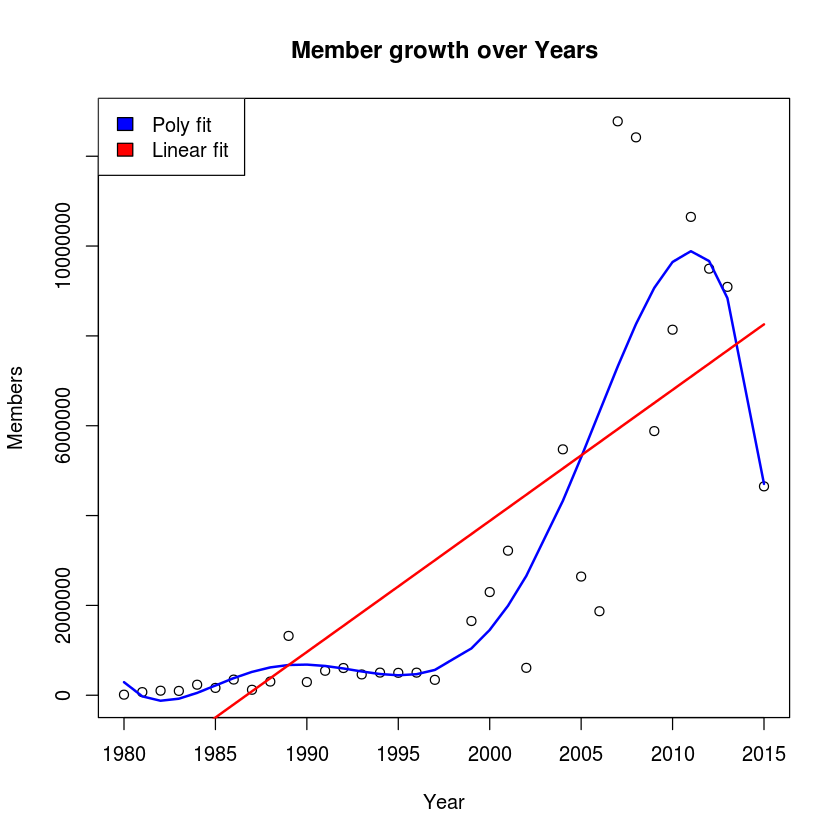

In [160]:
options(scipen=5)
plot(Members~Year,members)
title(main = 'Member growth over Years')
lines(members$Year,predsq,lwd=2,col='blue')
lines(members$Year,predlin,lwd=2,col='red')
legend('topleft',legend=c('Poly fit','Linear fit'),fill=c('blue','red'))

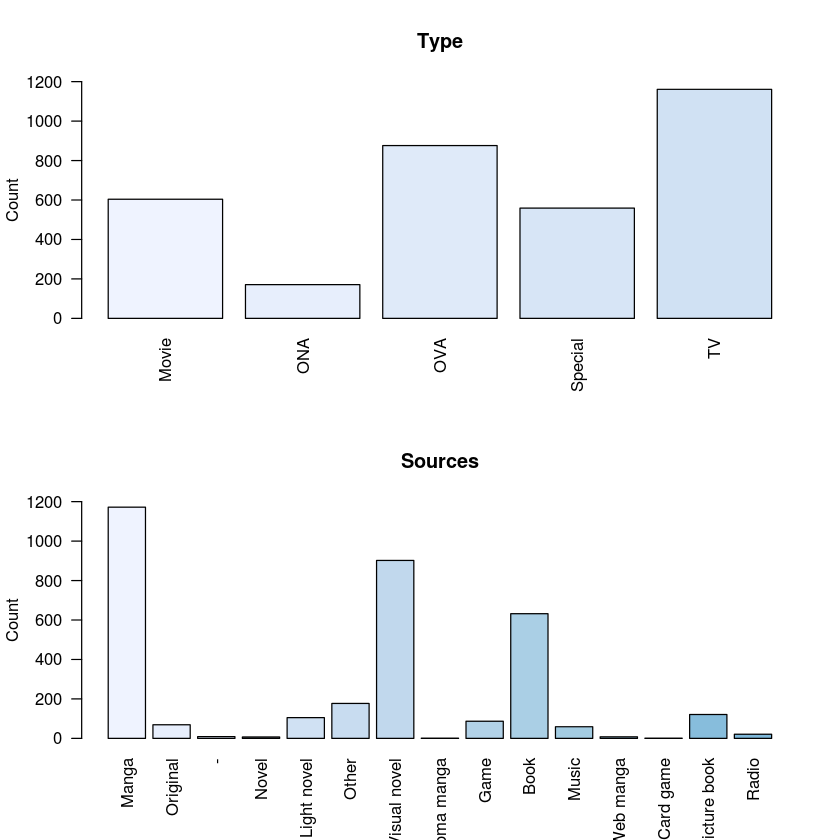

In [181]:
par(las=2)
layout(matrix(c(1,1,2,2), 2, 2, byrow = TRUE))
typeTable = table(df$Type)
sourceTable = table(df$Source)
barplot(typeTable,
        main = 'Type',
        ylab = 'Count', 
        col = cols,
        ylim=c(0,1200))

barplot(sourceTable, 
        main = 'Sources',
        ylim=c(0,1200),
        ylab='Count',
        names.arg = unlist(df[,lapply(.SD,unique),.SDcols='Source']),
        col=cols)